In [28]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.special import kolmogorov
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import levene

In [29]:
df = pd.read_csv('data.csv')
df

,Screen Size,Weight,Brightness
0,10.006692,29.313384,19.825988
1,10.081624,29.463248,19.993238
2,10.072873,29.445746,19.973641
3,9.954496,29.208992,19.710221
4,9.994093,29.288185,19.797988
...,...,...,...
995,10.034021,29.368042,19.886842
996,10.068130,29.436260,19.963027
997,9.969032,29.238063,19.742399
998,9.939579,29.179159,19.677249


Kiểm định shapiro:
Statistics=0.801, p=0.000
Sample does not look Gaussian (reject H0)
Kiểm định kolmogorov:
      Screen Size  Weight  Brightness
0    2.117579e-87     0.0         0.0
1    1.043264e-88     0.0         0.0
2    1.484532e-88     0.0         0.0
3    1.701454e-86     0.0         0.0
4    3.505286e-87     0.0         0.0
..            ...     ...         ...
995  7.081469e-88     0.0         0.0
996  1.797057e-88     0.0         0.0
997  9.534072e-87     0.0         0.0
998  3.080180e-86     0.0         0.0
999  5.798202e-85     0.0         0.0

[1000 rows x 3 columns]
stat=232.029, p=0.551
k = 0.02499117893906022 p = 0.5514851972998962
Sample looks Gaussian (fail to reject H0)
Kiểm tra tính thuần nhất:
1.Bartlett:
stat = 609.1564291909685 p = 5.2888602698504484e-133
True
2.Levene:
stat = 232.0294368715241 p = 2.0437017282021978e-94
True


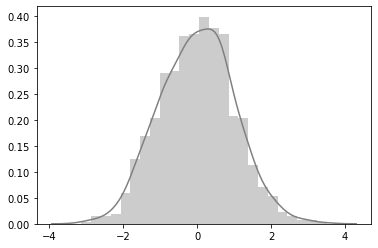

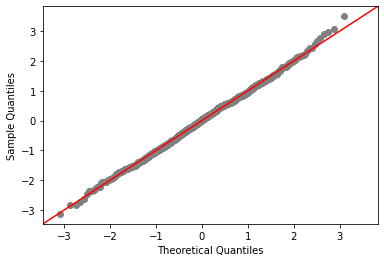

In [30]:
class math:
    def __init__(self,df):
        self.df = df
        
        self.screen_size = np.array(df['Screen Size'])
        self.weight = np.array(df['Weight'])
        self.bright = np.array(df['Brightness'])

        self.scr_s_chuan_hoa = (self.screen_size - np.mean(self.screen_size))/np.std(self.screen_size)
                      
    def dothi(self):
        sns.distplot(self.scr_s_chuan_hoa, color = "gray")
        sm.qqplot(self.scr_s_chuan_hoa, line="45", color = "gray")
        
    def shapiro(self):
        print("Kiểm định shapiro:")
        stat, p = shapiro(df)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
            
    def kolmogorov(self):
        print("Kiểm định kolmogorov:")
        print(kolmogorov(df))
        k, p = kstest(rvs=df['Screen Size'], cdf='norm', args=(np.mean(df['Screen Size']), np.std(df['Screen Size'])))
        print('stat=%.3f, p=%.3f' % (stat, p))
        print('k =',k , 'p =',p) 
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
           
    def kd_thuan_nhat(self):
        print('Kiểm tra tính thuần nhất:')
        print("1.Bartlett:")
        stat, p = bartlett(df['Screen Size'],df['Weight'],df['Brightness'])
        print('stat =',stat ,'p =',p)
        print(p < 0.05)
        
        print("2.Levene:")
        stat, p = levene(df['Screen Size'],df['Weight'],df['Brightness'])
        print('stat =',stat ,'p =',p)
        print(p < 0.05)
        
        
        
ADD = math(df)
ADD.dothi()
ADD.shapiro()
ADD.kolmogorov()
ADD.kd_thuan_nhat()     
